In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
#Only needs to run when runningon kaggle

In [2]:
iskaggle

''

Using Kaggle data on your own machine

In [2]:
creds = ''

#for working with paths in Python, It is recommended using pathlib.path

from pathlib import Path  


cred_path = Path('~/.kaggle/kaggle.json').expanduser()   #saved in kaggle.json


path = Path('us-patent-phrase-to-phrase-matching')  #creating a path alias for the path supplied


#use the kaggle api to download the data

if not iskaggle and not path.exists():
    import zipfile, kaggle
    kaggle.api.competition_download_cli(str(path))  #same kaggle cli operation in python
    zipfile.ZipFile(f'{path}.zip').extractall(path)  #command to unzip and extract the dataset to the path
    

In [3]:
if iskaggle:
    path = ('../FastAI_self/us-patent-phrase-to-phrase-matching')  #re-mention the path to the path alias
    !pip install -q datasets

In [4]:
!ls {path}

sample_submission.csv  test.csv  train.csv


In [5]:
path

PosixPath('us-patent-phrase-to-phrase-matching')

In [8]:
import pandas as pd

df = pd.read_csv(path/'train.csv')
df.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [8]:
df.describe(include='object')

,id,anchor,target,context
count,36473,36473,36473,36473
unique,36473,733,29340,106
top,37d61fd2272659b1,component composite coating,composition,H01
freq,1,152,24,2186


In [9]:
df['input'] = 'TEXT1:' + df.context + ';TEXT2: '  + df.target + '; ANC1: ' + df.anchor

In [10]:
df.input.head()

0    TEXT1:A47;TEXT2: abatement of pollution; ANC1:...
1     TEXT1:A47;TEXT2: act of abating; ANC1: abatement
2    TEXT1:A47;TEXT2: active catalyst; ANC1: abatement
3    TEXT1:A47;TEXT2: eliminating process; ANC1: ab...
4      TEXT1:A47;TEXT2: forest region; ANC1: abatement
Name: input, dtype: object

Tokenization

In [11]:
from datasets import Dataset, DatasetDict


ds = Dataset.from_pandas(df)

In [12]:
ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score', 'input'],
    num_rows: 36473
})

We cant pass the texts directly into the model. A deep learning model expects numbers as inputs, hence we can do two things
* Tokenization: splitting sentences into words or tokens
* Numericalization: Covert each word (or token) into a number.

Huggingface transformers supply numerous models, so details about how to tokenize the dataset depends on the model we use, Generally replace small with large for a slower but accurate model once you have finished exploring

In [13]:
model_nm = 'microsoft/deberta-v3-small'


AutoTokenize will create a tokenize appropriate for a given model:

In [14]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
tokz = AutoTokenizer.from_pretrained('microsoft/deberta-v3-small')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/home/susearc/miniconda3/envs/DeepLearning/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:446: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [15]:
#Example

tokz.tokenize("Asphalt is a sticky black substance that is used to pave roads, parking lots and driveways. It is made from crude oil and can withstand high temperatures and heavy traffic. Asphalt is also very versatile and can be mixed with different materials to create different colors and textures. Some people even use asphalt to make art or play games. For example, you can draw with chalk on asphalt, or use it as a giant board for hopscotch or tic-tac-toe. Asphalt is not only a practical material, but also a exhilarating!")

['▁Asphalt',
 '▁is',
 '▁a',
 '▁sticky',
 '▁black',
 '▁substance',
 '▁that',
 '▁is',
 '▁used',
 '▁to',
 '▁pave',
 '▁roads',
 ',',
 '▁parking',
 '▁lots',
 '▁and',
 '▁driveways',
 '.',
 '▁It',
 '▁is',
 '▁made',
 '▁from',
 '▁crude',
 '▁oil',
 '▁and',
 '▁can',
 '▁withstand',
 '▁high',
 '▁temperatures',
 '▁and',
 '▁heavy',
 '▁traffic',
 '.',
 '▁Asphalt',
 '▁is',
 '▁also',
 '▁very',
 '▁versatile',
 '▁and',
 '▁can',
 '▁be',
 '▁mixed',
 '▁with',
 '▁different',
 '▁materials',
 '▁to',
 '▁create',
 '▁different',
 '▁colors',
 '▁and',
 '▁textures',
 '.',
 '▁Some',
 '▁people',
 '▁even',
 '▁use',
 '▁asphalt',
 '▁to',
 '▁make',
 '▁art',
 '▁or',
 '▁play',
 '▁games',
 '.',
 '▁For',
 '▁example',
 ',',
 '▁you',
 '▁can',
 '▁draw',
 '▁with',
 '▁chalk',
 '▁on',
 '▁asphalt',
 ',',
 '▁or',
 '▁use',
 '▁it',
 '▁as',
 '▁a',
 '▁giant',
 '▁board',
 '▁for',
 '▁hops',
 'co',
 'tch',
 '▁or',
 '▁tic',
 '-',
 'tac',
 '-',
 'toe',
 '.',
 '▁Asphalt',
 '▁is',
 '▁not',
 '▁only',
 '▁a',
 '▁practical',
 '▁material',
 ',',
 '▁b

In [16]:
#Simple function to tokenize our input


def tok_func(x):
    return tokz(x['input'])

In [17]:
tok_ds = ds.map(tok_func, batched=True)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [18]:
tok_ds.data


InMemoryTable
id: string
anchor: string
target: string
context: string
score: double
input: string
input_ids: list<item: int32>
  child 0, item: int32
token_type_ids: list<item: int8>
  child 0, item: int8
attention_mask: list<item: int8>
  child 0, item: int8
----
id: [["37d61fd2272659b1","7b9652b17b68b7a4","36d72442aefd8232","5296b0c19e1ce60e","54c1e3b9184cb5b6",...,"1957604978889672","0914a65df828ffc0","f5e0068000f0b361","2d5f035af810c1a2","541198ebfc08e6b2"],["26c0231601242aad","c6b1558ec038c539","b4cf0048799a51e2","03b8c54af3f4cb9b","ee6a44dd61b3ffee",...,"fa7f80ed4847b63a","5f2502d45c21ae8f","57eabd95b3b47727","22ae2bdc83345365","4f6bd3782a452c93"],...,["1e1f881c014b27f1","62adf1a79cdcdcd8","e39accc1e9470efc","32102b760765c7dd","bd73e6a1ad01b298",...,"4dad5d8ab19a2d22","7e9615f8aab0273d","8527077e4116f89d","c8656004664bf5f2","bac3feec26433ca9"],["f7fa7c8605c40a78","c8757b8201719536","c2aeb2bacfb272b1","217271e252282202","e9492b2f6cbafdef",...,"8e1386cbefd7f245","42d9e032d1cd3242"

In [19]:
#The tokenize function adds a new item to our dataset called input_ids. For instance here is the input and IDs for the first row of our data:
row = tok_ds[0]
row['input'], row['input_ids']

('TEXT1:A47;TEXT2: abatement of pollution; ANC1: abatement',
 [1,
  54453,
  435,
  294,
  558,
  5753,
  346,
  104917,
  445,
  294,
  47284,
  265,
  6435,
  346,
  23702,
  435,
  294,
  47284,
  2])

In [20]:
tokz.vocab #maintains list of words with tokens

{'resse': 65597,
 '揭': 126732,
 'Thriller': 118201,
 '▁Chaz': 63149,
 '▁Lovett': 75314,
 '▁riverbed': 88167,
 '▁bound': 4935,
 '▁Kidd': 35549,
 'fur': 24102,
 'adjusted': 31193,
 '▁Oooo': 95340,
 'strewn': 102504,
 '▁acceptability': 65783,
 '▁pavers': 42301,
 '▁BOA': 90238,
 '▁Afford': 86454,
 '▁Dhruv': 117301,
 '▁Setter': 82396,
 '▁infidelity': 44734,
 'confused': 115850,
 'broek': 109322,
 '▁Nantwich': 119669,
 '▁Following': 4087,
 '▁capillary': 44346,
 '▁friendliness': 39978,
 '▁Shino': 90040,
 '▁Conspiracy': 44200,
 'hier': 68546,
 'opportunities': 114131,
 '▁Lecture': 21482,
 '▁Cochran': 46867,
 '▁aliment': 73487,
 '▁Rasheed': 87338,
 '▁Disabled': 37572,
 'haug': 115305,
 '▁plastid': 117798,
 '▁extend': 4388,
 '▁Sigrid': 118073,
 'Tutorial': 122049,
 '▁Pembroke': 43854,
 '▁Finn': 14688,
 '舊': 126133,
 '▁buckwheat': 59926,
 '▁regulate': 10445,
 '▁tag': 4149,
 '▁brandy': 40507,
 'pitched': 55312,
 '▁Informer': 89642,
 '▁essays': 6422,
 '▁Http': 49286,
 '▁BEGIN': 79264,
 '▁categorize

In [21]:
tokz.vocab['of']

1580

In [22]:
#Finally we need to prepare our labels. Transformers always assumes that your labels has the column name labels, but currently it is score, hence we need to change it

tok_ds = tok_ds.rename_columns({'score': 'labels'})

In [23]:
#Now that we have prepared our tokens and lables we need ot create our validation set

Test and validation sets

In [24]:
eval_df = pd.read_csv(path/'test.csv')
eval_df.describe()

,id,anchor,target,context
count,36,36,36,36
unique,36,34,36,29
top,4112d61851461f60,el display,inorganic photoconductor drum,G02
freq,1,2,1,3


Validation set

In [25]:
#To explain the motivation, lets start simple, and imagine we are trying to fit a model where the true relationship is this quadratic:


def f(x):
    return -3*x**2 + 2*x + 20

In [26]:
#unfortunately matplotlib doesnt come with a way to visualize a function
#so we will create one

import numpy as np, matplotlib.pyplot as plt

def plot_function(f, min=-2.1,max=2.1, color='r'):
    x = np.linspace(min,max,100)[:,None]
    plt.plot(x, f(x), color)

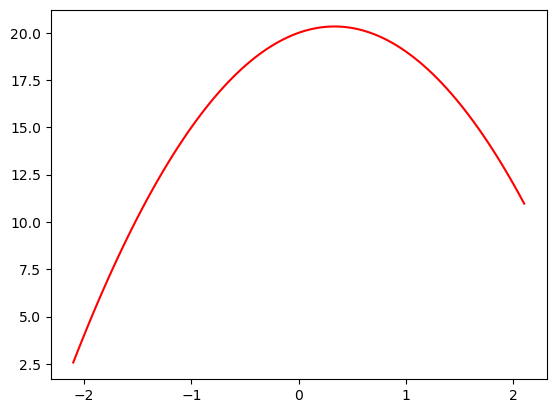

In [27]:
plot_function(f)

In [28]:
#For instance, perhaps we have measuered the height above ground of an object before and after some event. The measurement will have some random error. We can use numpy's random number generator to simulate tha. I lik to use seed when writing about simulations like this so that I know you'll see the same thing I do:

In [29]:
from numpy.random import normal,seed,uniform
np.random.seed(42)

In [30]:
#Lets create a function add_noise that adds some random variatin to an array:
def noise(x, scale):
    return normal(scale=scale, size=x.shape)

def add_noise(x, mult, add):
    return x*(1+noise(x, mult)) + noise(x, add)

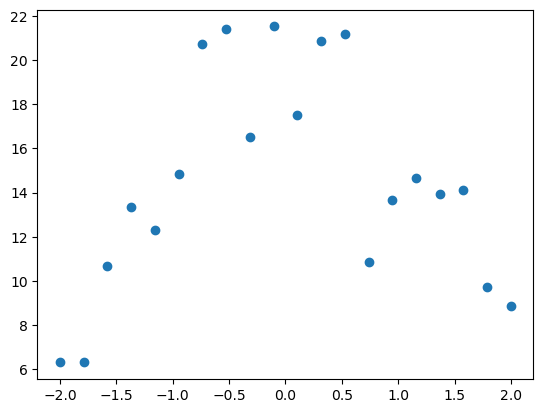

In [31]:
#Lets use it to simulate some measurements evenly distributed over time:

x  = np.linspace(-2,2, num=20)[:,None]
y = add_noise(f(x), 0.2, 1.3)
plt.scatter(x,y)

In [32]:
#Now lets try to fit different function in the above dataset

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def plot_poly(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x,y)
    plt.scatter(x,y)
    plot_function(model.predict)

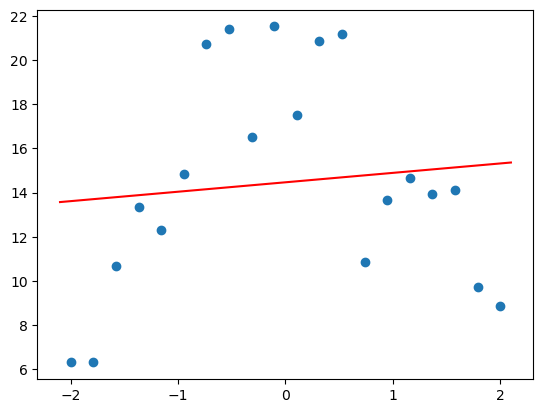

In [33]:
plot_poly(1)  #1-degree equation or y = ax + b

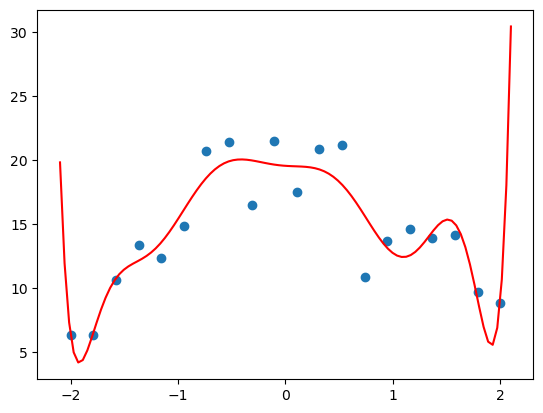

In [34]:
plot_poly(10)  #10-degree polynomial

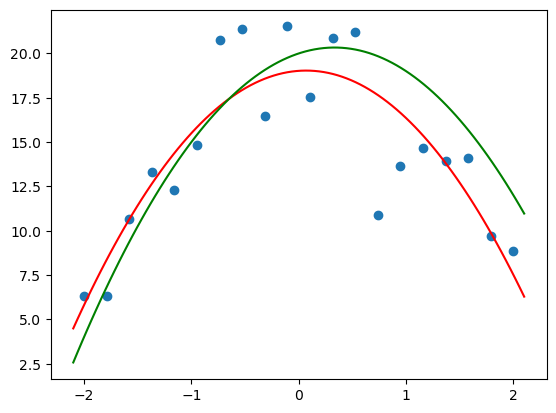

In [35]:
#lets try a 2-degree polynomial and compare it with our defined function

plot_poly(2)
plot_function(f, color='g')



#almost similar

In [36]:
#Transformers uses a DatasetDict for holding your training and validationsets. To create on e that contains 25% of our data for the validationset, and 75% for the training set, use train_test_split


dds = tok_ds.train_test_split(0.23, seed=42)
dds

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 28084
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8389
    })
})

## N.B -- The validation set created by the transformers is called test and not validation, hence not to be confused

In [37]:
# we will use eval as our name for the test set, to avoid confusion with the test dataset that was created above]



eval_df['input'] = 'TEXT1: ' + eval_df.context + '; TEXT2: ' + eval_df.target + '; ANC1: ' + eval_df.anchor


eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

In [38]:
eval_ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36
})

Metrics and Correlation

In [40]:
#This competition uses pearson correlation coefficient.
#To see how it works we will use the california housing dataset


from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing = housing['data'].join(housing['target']).sample(1000, random_state=52)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7506,3.0550,37.0,5.152778,1.048611,729.0,5.062500,33.92,-118.28,1.054
4720,3.0862,35.0,4.697897,1.055449,1159.0,2.216061,34.05,-118.37,3.453
12888,2.5556,24.0,4.864905,1.129222,1631.0,2.395007,38.66,-121.35,1.057
13344,3.0057,32.0,4.212687,0.936567,1378.0,5.141791,34.05,-117.64,0.969
7173,1.9083,42.0,3.888554,1.039157,1535.0,4.623494,34.05,-118.19,1.192


In [41]:
#We can see all the correlation coefficients for every combination of columns in this dataset by calling np.corrcoef

np.set_printoptions(precision=2, suppress=True)
np.corrcoef(housing, rowvar=False)


#This works greate for multiple values at once.

array([[ 1.  , -0.12,  0.43, -0.08,  0.01, -0.07, -0.12,  0.04,  0.68],
       [-0.12,  1.  , -0.17, -0.06, -0.31,  0.  ,  0.03, -0.13,  0.12],
       [ 0.43, -0.17,  1.  ,  0.76, -0.09, -0.07,  0.12, -0.03,  0.21],
       [-0.08, -0.06,  0.76,  1.  , -0.08, -0.07,  0.09,  0.  , -0.04],
       [ 0.01, -0.31, -0.09, -0.08,  1.  ,  0.16, -0.15,  0.13,  0.  ],
       [-0.07,  0.  , -0.07, -0.07,  0.16,  1.  , -0.16,  0.17, -0.27],
       [-0.12,  0.03,  0.12,  0.09, -0.15, -0.16,  1.  , -0.93, -0.16],
       [ 0.04, -0.13, -0.03,  0.  ,  0.13,  0.17, -0.93,  1.  , -0.03],
       [ 0.68,  0.12,  0.21, -0.04,  0.  , -0.27, -0.16, -0.03,  1.  ]])

In [42]:
#but for comparing two features
np.corrcoef(housing.MedHouseVal, housing.MedInc)

array([[1.  , 0.68],
       [0.68, 1.  ]])

In [71]:
def corr(x,y):
    if np.corrcoef(x,y)[0,1] != 1:
        return np.corrcoef(x,y)[0,1]
    else:
        return np.corrcoef(x,y)[0,0]

In [72]:
corr(housing.MedHouseVal, housing.MedInc)

0.6760250732906005

In [87]:
#Now lets create a function to check two features from a  dataset and plot their correlation graph

def show_corr(df, a, b):
    x,y = df[a],df[b]
    cr = corr(x,y)
    plt.scatter(x,y, alpha=0.4, s=4)
    plt.title(f'{a} vs {b};  r:{cr:.2f}')


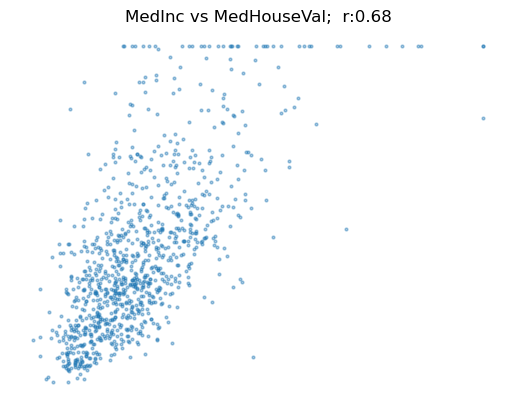

In [82]:
show_corr(housing, 'MedInc', 'MedHouseVal')

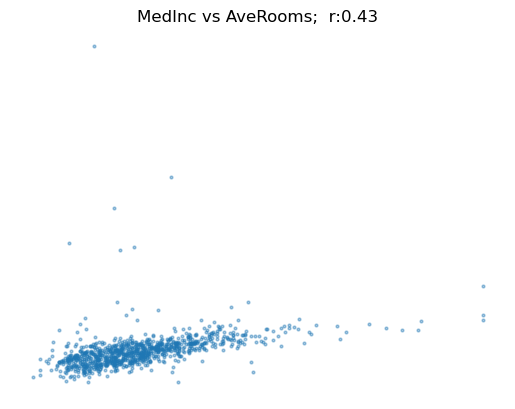

In [83]:
show_corr(housing, 'MedInc','AveRooms')

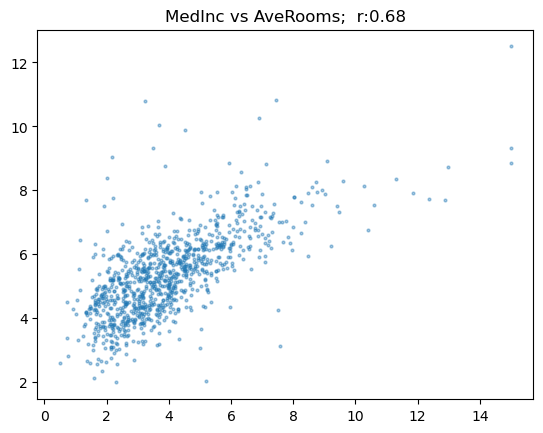

In [98]:
#Lets try to remove the outliers and check if the value of r increase

subset = housing[housing.AveRooms<15]
show_corr(subset, 'MedInc','AveRooms')

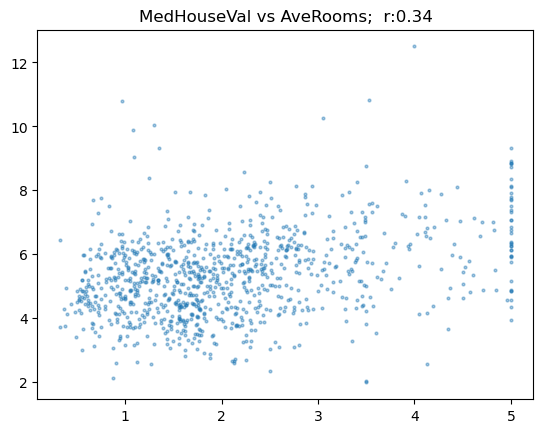

In [100]:
#Here's another example

show_corr(subset, 'MedHouseVal', 'AveRooms')

In [97]:
housing.MedHouseVal

7506     1.054
4720     3.453
12888    1.057
13344    0.969
7173     1.192
         ...  
10535    2.454
3029     0.638
7985     1.563
13724    0.728
13520    2.213
Name: MedHouseVal, Length: 1000, dtype: float64

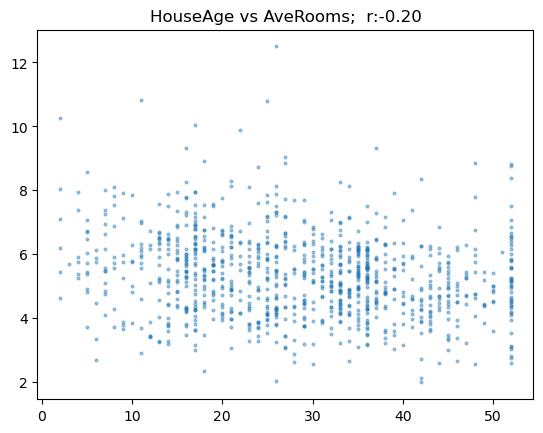

In [101]:
show_corr(subset, 'HouseAge', 'AveRooms')


Transformers expects metrics to be returned as a dict, since that way the trainer knows what label to use

In [102]:
def  corr_d(eval_pred):
    return {'pearson': corr(*eval_pred)}

Training

In [103]:
#Training our model

from transformers import TrainingArguments, Trainer
# we pick a batch size that fits our GPU, and small number of epochs so we can run experiments quickly

bs = 128
epochs = 4

In [104]:
#The most imp hyperparameter is the learning rate. Fastai provides a learning rate finder to help you figure this out. But transformers dont. The key is to find the largest value you can, but which doesnt result in training failing

lr = 8e-5

In [106]:
#Transformers uses the TrainingArguments class to set up arguments.Don't worry too much about the values were using here

args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=False,
                         evaluation_strategy='epoch',
                         per_device_eval_batch_size=bs,
                         per_gpu_eval_batch_size=bs*2,
                         num_train_epochs=epochs,
                         weight_decay=0.01,
                         report_to='none')

In [108]:
#We can now create our model and Trainer which is a class which combine the data and model together


model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)

trainer = Trainer(model, args, train_dataset=dds['train'], 
                  eval_dataset=dds['test'],
                  tokenizer=tokz,
                  compute_metrics=corr_d)

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.weight', 'mask_predictions.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

In [ ]:
trainer.train()

In [ ]:
#Lets get some predictions

preds = trainer.predict(eval_ds).predictions.astype(float)
preds

In [ ]:
#We can see that some of the values are below 0 and some above 1

#To limit this we can use 